In [ ]:
#%pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0 matplotlib numpy

In [2]:


import PIL.Image as Image
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import tensorflow as tf
import tensorflow_hub as hub
%load_ext tensorboard

/Users/oluwadarasimioloyede/dpl/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

In [4]:
classifier_model = mobilenet_v2

In [5]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape = IMAGE_SHAPE+(3,))
])

In [6]:
_URL = "###ENTER URL HERE###"


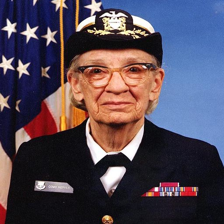

In [7]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [8]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [9]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 253ms/step


(1, 1001)

In [10]:
predicted_class = tf.math.argmax(result[0], axis=-1)
predicted_class

<tf.Tensor: shape=(), dtype=int64, numpy=653>

In [11]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

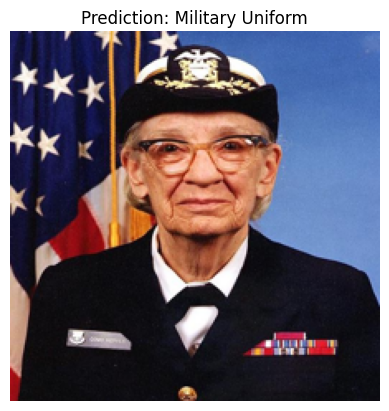

In [12]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [13]:
import pathlib
dataset_url = "https://salford.figshare.com/ndownloader/files/36524085"
data_dir = tf.keras.utils.get_file('dataset', origin=dataset_url, untar=True, cache_dir = '/content')
data_dir = pathlib.Path(data_dir)

In [14]:
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [15]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 751 files belonging to 10 classes.
Using 676 files for training.


In [16]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 751 files belonging to 10 classes.
Using 150 files for validation.


In [17]:
train_ds = train_dataset
val_ds = validation_dataset

In [18]:
class_names = np.array(train_ds.class_names)
print(class_names)

['Chapman' 'Cockcroft' 'Library' 'Maxwell' 'Media City Campus'
 'New Adelphi' 'New Science' 'Newton' 'Sports Center' 'University House']


In [19]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.

In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


2024-11-25 19:29:12.214146: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [22]:
result_batch = classifier.predict(train_ds)

22/22 [==============================] - 10s 298ms/step


In [23]:
predicted_class_names = imagenet_labels[tf.math.argmax(result_batch, axis=-1)]
predicted_class_names

array(['chainlink fence', 'crate', 'cinema', 'steel arch bridge',
       'solar dish', 'mobile home', 'airship', 'monastery', 'library',
       'patio', 'cinema', 'patio', 'planetarium', 'garbage truck', 'pier',
       'flagpole', 'freight car', 'prison', 'patio', 'monastery',
       'apiary', 'prison', 'barn', 'picket fence', 'turnstile',
       'container ship', 'scoreboard', 'library', 'patio', 'prison',
       'freight car', 'cab', 'cinema', 'mobile home', 'tile roof',
       'mobile home', 'crate', 'tile roof', 'monastery', 'patio',
       'prison', 'birdhouse', 'prison', 'flagpole', 'solar dish',
       'palace', 'bell cote', 'obelisk', 'triumphal arch', 'mobile home',
       'palace', 'prison', 'space shuttle', 'street sign', 'boathouse',
       'prison', 'street sign', 'library', 'prison', 'palace', 'crane',
       'freight car', 'prison', 'tile roof', 'tile roof', 'mobile home',
       'mobile home', 'steel arch bridge', 'swing', 'palace',
       'greenhouse', 'library', 'tile

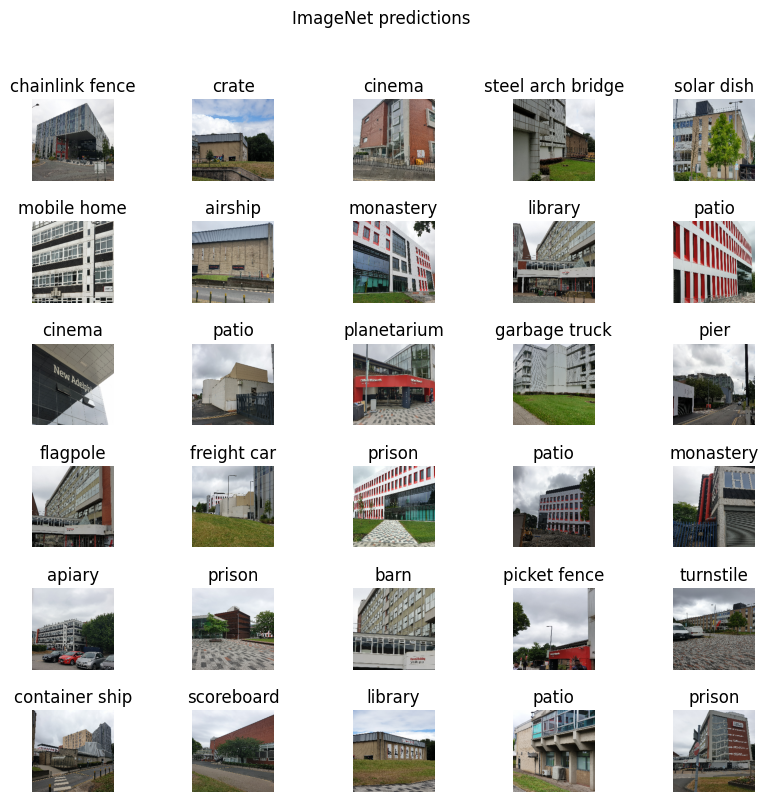

In [24]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [25]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
inception_v3 = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"

feature_extractor_model = inception_v3

In [26]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model,
    input_shape=(224, 224, 3),
    trainable=False)

In [27]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [28]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 21823274 (83.25 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [29]:
predictions = model(image_batch)

In [30]:
predictions.shape

TensorShape([32, 10])

In [31]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1) # Enable histogram computation for every epoch.

In [32]:
NUM_EPOCHS = 10

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=NUM_EPOCHS,
                    callbacks=tensorboard_callback)

Epoch 1/10
22/22 [==============================] - 16s 639ms/step - loss: 2.1820 - acc: 0.2618 - val_loss: 1.5164 - val_acc: 0.4933
Epoch 2/10
22/22 [==============================] - 12s 535ms/step - loss: 1.2557 - acc: 0.5902 - val_loss: 1.0566 - val_acc: 0.6800
Epoch 3/10
22/22 [==============================] - 13s 616ms/step - loss: 0.9167 - acc: 0.7367 - val_loss: 0.8372 - val_acc: 0.7267
Epoch 4/10
22/22 [==============================] - 12s 564ms/step - loss: 0.7059 - acc: 0.8254 - val_loss: 0.7291 - val_acc: 0.7533
Epoch 5/10
22/22 [==============================] - 12s 549ms/step - loss: 0.5806 - acc: 0.8639 - val_loss: 0.6688 - val_acc: 0.7533
Epoch 6/10
22/22 [==============================] - 12s 543ms/step - loss: 0.5001 - acc: 0.8979 - val_loss: 0.6288 - val_acc: 0.7600
Epoch 7/10
22/22 [==============================] - 12s 546ms/step - loss: 0.4349 - acc: 0.9068 - val_loss: 0.5847 - val_acc: 0.8000
Epoch 8/10
22/22 [==============================] - 12s 564ms/step - 

In [33]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 14816), started 2 days, 22:33:22 ago. (Use '!kill 14816' to kill it.)

In [34]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

1/1 [==============================] - 1s 839ms/step
['New Adelphi' 'Sports Center' 'Maxwell' 'Library' 'Newton' 'Cockcroft'
 'Sports Center' 'New Science' 'Maxwell' 'New Science' 'New Adelphi'
 'Chapman' 'Library' 'Library' 'Chapman' 'Maxwell' 'Chapman' 'New Science'
 'New Science' 'Cockcroft' 'Cockcroft' 'Chapman' 'Maxwell' 'Library'
 'Newton' 'Sports Center' 'Maxwell' 'Sports Center' 'University House'
 'Maxwell' 'Chapman' 'Maxwell']


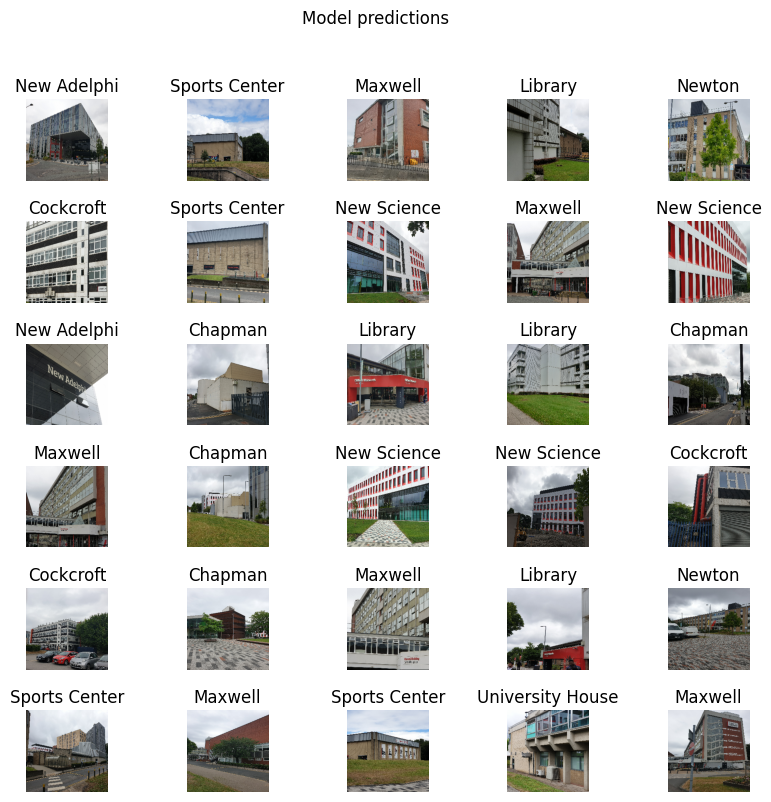

In [35]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_label_batch[n].title())
  plt.axis('off')
_ = plt.suptitle("Model predictions")

In [36]:
# import numpy as np
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'test_data' is your test dataset (ImageDataGenerator or TF Dataset)

# # Evaluate the model on the test dataset
# y_true = test_data.classes  # True labels
# y_pred_probs = classifier_model.predict(test_data)  # Predicted probabilities
# y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted labels

# # Metrics
# print("Accuracy:", accuracy_score(y_true, y_pred))
# print("\nClassification Report:")
# print(classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_true, y_pred)
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=test_data.class_indices.keys(),
#             yticklabels=test_data.class_indices.keys())
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()
